In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../input/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


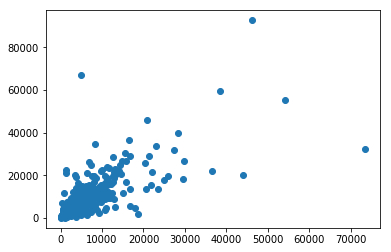

In [3]:
plt.scatter(x = df['Milk'], y = df['Grocery'])

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
temp = df[['Milk', 'Grocery']]
temp = temp.as_matrix().astype('float32', copy = False)
std_scaler = StandardScaler().fit(temp)
temp = std_scaler.transform(temp)
dbscan = DBSCAN(eps = 0.5, min_samples = 15).fit(temp)
core_samples = np.zeros_like(dbscan.labels_, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


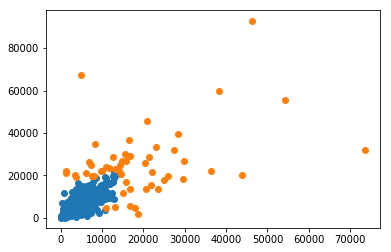

In [6]:
x = pd.DataFrame(core_samples, columns=['cluster']) 
ind = x.index[x['cluster'] == True].tolist()
p1 = df.iloc[ind, :]
p2 = pd.concat([df,p1]).drop_duplicates(keep=False)
plt.scatter(x = p1['Milk'], y = p1['Grocery'])
plt.scatter(x = p2['Milk'], y = p2['Grocery'])